# Trabajando con columnas

Además de las funciones vistas anteriormente __Pandas__ tiene una serie de funciones para trabajar con columnas, tanto para analizar como para crear nuevas columnas.

Empezamos por cargar los datos que hemos estado utilizando.

In [1]:
import pandas as pd

tipos = {'Numero':'int', 'Expediente':'str', 'Nombre':'str', 'Apellido':'str',
         'Plan':'str', 'Tarea1':'float', 'Examen1':'float', 'Tarea2':'float',
         'Examen2':'float', 'Tarea3':'float', 'Examen3':'float'}

df = pd.read_csv('ListaAlumnos.csv', index_col='Expediente', dtype=tipos)
len(df)

16

Además, le indicaremos a __matplotlib__ (librería que __Pandas__ utiliza para hacer gráficas) que queremos ver las gráficas en este mismo _notebook_.

In [2]:
%matplotlib inline

### Análisis por columna

El método `value_counts()` nos permite analizar la frecuencia de cada uno de los valores que tiene una columna

In [3]:
df.Examen2.value_counts()

100.0    8
95.0     3
90.0     2
60.0     2
97.5     1
Name: Examen2, dtype: int64

Este método es similar a un histograma de frecuencias, que se puede hacer mediante el método `hist()`. 

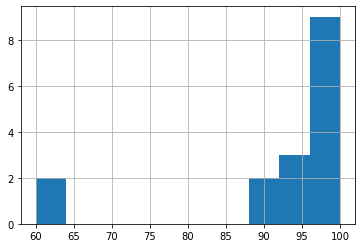

In [4]:
df.Examen2.hist()

__Nota__ Los valores no coinciden porque el histograma trabaja con intervalos.

Si queremos conocer unicamente cuantos valores únicos hay, podemos utilizar el método `nunique()`.

In [5]:
df.Examen2.nunique()

5

El método`describe()` fue mencionado anteriormente.

In [6]:
df.describe()

,Numero,Tarea1,Examen1,Tarea2,Examen2,Tarea3,Examen3
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,8.500000,83.375000,68.375000,87.562500,92.656250,90.625000,47.000000
std,4.760952,24.374509,20.710303,20.607341,13.212013,20.155644,33.348663
min,1.000000,33.000000,23.000000,33.000000,60.000000,50.000000,0.000000
25%,4.750000,67.000000,62.250000,67.000000,93.750000,100.000000,22.000000
50%,8.500000,100.000000,69.000000,100.000000,98.750000,100.000000,50.000000
75%,12.250000,100.000000,78.750000,100.000000,100.000000,100.000000,75.000000
max,16.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Los valores que esta tabla automática contiene se pueden conocer con métodos específicos:

El mínimo se puede obtener con el método `min()`.

In [7]:
df.Examen2.min()

60.0

El máximo se puede obtener con el método `max()`.

In [8]:
df.Examen2.max()

100.0

El promedio de una columna se obtiene con `mean()`.

In [9]:
df.Examen2.mean()

92.65625

La varianza usando `var()`.

In [10]:
df.Examen2.var()

174.55729166666666

La desviación estándar con `std()`.

In [11]:
df.Examen2.std()

13.212013157224249

Para la suma total de la columna se puede usar `sum()`.

In [12]:
df.Examen2.sum()

1482.5

Se puede contar el número de valores (excluyendo `null` y `NA`) usando `count()`.

In [13]:
df.Examen2.count()


16

La mediana se puede calcular con `median()`

In [14]:
df.Examen2.median()

98.75

Los cuantiles se pueden obtener con `quantile()`, indicando con una lista los valores de inicio y final de los intervalos (de 0 a 1). 

In [15]:
df.Examen2.quantile([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) # deciles

0.0     60.00
0.1     75.00
0.2     90.00
0.3     95.00
0.4     95.00
0.5     98.75
0.6    100.00
0.7    100.00
0.8    100.00
0.9    100.00
1.0    100.00
Name: Examen2, dtype: float64

Para hacer una gráfica con los valores de una columna se puede utilizar simplemente `plot()`. 

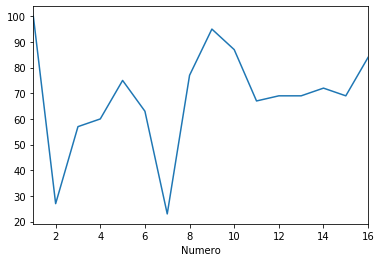

In [16]:
df.set_index('Numero').Examen1.plot()

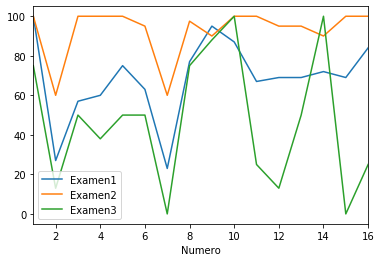

In [17]:
df.set_index('Numero')[['Examen1','Examen2','Examen3']].plot()

### Datos no existentes

Un dato faltante puede modificar nuestras conclusiones por lo que es bueno detectarlo y, si fuera necesario, modificar el _dataframe_ para poder trabajar con los datos restantes. El objeto _dataframe_ tiene dos métodos especializados para trabajar con datos faltantes:

    * `df.dropna()` borrará las lineas en las que falte un dato.
    * `df.fillna(<value>)` colocará <value> para los valores que no existan.

### Creando columnas

Para crear una columna basta asignarle un valor a un _nombre_ o _identificador_ nuevo del _dataframe_. Para esto es necesario siempre utilizar la nomenclatura con `['<columna>']`

In [18]:
df['Tareas'] = (df.Tarea1 + df.Tarea2 + df.Tarea3) / 3
df.head()

,Numero,Nombre,Apellido,Plan,Tarea1,Examen1,Tarea2,Examen2,Tarea3,Examen3,Tareas
Expediente,,,,,,,,,,,
297613,1,Margarita,Duarte,LIM2014,100.0,100.0,100.0,100.0,100.0,75.0,100.000000
261301,2,Manolo,Garcia,LIM2014,100.0,27.0,100.0,60.0,50.0,13.0,83.333333
262979,3,Tomas,Gomez,LIM2014,67.0,57.0,100.0,100.0,100.0,50.0,89.000000
223867,4,Susana,Gonzalez,LIM2014,100.0,60.0,33.0,100.0,100.0,38.0,77.666667
200389,5,Itzel,Hernandez,LIM2014,100.0,75.0,67.0,100.0,100.0,50.0,89.000000


Para columnas numéricas se pueden usar los métodos anteriormente presentadas si añadimos `axis=1` en la llamada.

In [19]:
df['Examenes'] = df[['Examen1','Examen2','Examen3']].mean(axis=1)
df.head()

,Numero,Nombre,Apellido,Plan,Tarea1,Examen1,Tarea2,Examen2,Tarea3,Examen3,Tareas,Examenes
Expediente,,,,,,,,,,,,
297613,1,Margarita,Duarte,LIM2014,100.0,100.0,100.0,100.0,100.0,75.0,100.000000,91.666667
261301,2,Manolo,Garcia,LIM2014,100.0,27.0,100.0,60.0,50.0,13.0,83.333333,33.333333
262979,3,Tomas,Gomez,LIM2014,67.0,57.0,100.0,100.0,100.0,50.0,89.000000,69.000000
223867,4,Susana,Gonzalez,LIM2014,100.0,60.0,33.0,100.0,100.0,38.0,77.666667,66.000000
200389,5,Itzel,Hernandez,LIM2014,100.0,75.0,67.0,100.0,100.0,50.0,89.000000,75.000000


In [20]:
df['Final'] = 0.7 * df.Examenes + 0.3 * df.Tareas
df.head()

,Numero,Nombre,Apellido,Plan,Tarea1,Examen1,Tarea2,Examen2,Tarea3,Examen3,Tareas,Examenes,Final
Expediente,,,,,,,,,,,,,
297613,1,Margarita,Duarte,LIM2014,100.0,100.0,100.0,100.0,100.0,75.0,100.000000,91.666667,94.166667
261301,2,Manolo,Garcia,LIM2014,100.0,27.0,100.0,60.0,50.0,13.0,83.333333,33.333333,48.333333
262979,3,Tomas,Gomez,LIM2014,67.0,57.0,100.0,100.0,100.0,50.0,89.000000,69.000000,75.000000
223867,4,Susana,Gonzalez,LIM2014,100.0,60.0,33.0,100.0,100.0,38.0,77.666667,66.000000,69.500000
200389,5,Itzel,Hernandez,LIM2014,100.0,75.0,67.0,100.0,100.0,50.0,89.000000,75.000000,79.200000


Claro, además siempre es posible asignar con un ciclo `for`, aunque normalmente será más tardado. Para esto utilizamos el método `iterrow()`:

In [21]:
df['Anotacion'] = ''

for i, row in df.iterrows():
    if row.Final > 90.0:
        df.loc[i,'Anotacion'] = 'Muy buena nota.'

In [22]:
df.head()

,Numero,Nombre,Apellido,Plan,Tarea1,Examen1,Tarea2,Examen2,Tarea3,Examen3,Tareas,Examenes,Final,Anotacion
Expediente,,,,,,,,,,,,,,
297613,1,Margarita,Duarte,LIM2014,100.0,100.0,100.0,100.0,100.0,75.0,100.000000,91.666667,94.166667,Muy buena nota.
261301,2,Manolo,Garcia,LIM2014,100.0,27.0,100.0,60.0,50.0,13.0,83.333333,33.333333,48.333333,
262979,3,Tomas,Gomez,LIM2014,67.0,57.0,100.0,100.0,100.0,50.0,89.000000,69.000000,75.000000,
223867,4,Susana,Gonzalez,LIM2014,100.0,60.0,33.0,100.0,100.0,38.0,77.666667,66.000000,69.500000,
200389,5,Itzel,Hernandez,LIM2014,100.0,75.0,67.0,100.0,100.0,50.0,89.000000,75.000000,79.200000,
